<a href="https://www.kaggle.com/code/loananh/linear-regression?scriptVersionId=227314859" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Prepare Python Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression

# Load Dataframe
data = pd.read_csv('/kaggle/input/hose-market/CafeF.HSX.Upto07.03.2025.csv')

# Rename column <DTYYYYMMDD> to Date
data.rename(columns={'<DTYYYYMMDD>': '<Date>'}, inplace=True)

# Convert <DTYYYYMMDD> from number to date format
data['<Date>'] = pd.to_datetime(data['<Date>'], format='%Y%m%d')

# Filter Stock Data for Analytics (SSI Stock in 8 years)
start_date = datetime.now()
end_date = datetime(start_date.year-8, start_date.month, start_date.day)
df = data[(data['<Ticker>']=='SSI') & (data['<Date>'] >= end_date) & (data['<Date>'] <= start_date)]

# Sort date and index in ascending
df = df.iloc[::-1]
df = df.reset_index(drop = True, inplace = False)

print(df.head())
print(df.tail())

  <Ticker>     <Date>  <Open>  <High>   <Low>  <Close>  <Volume>
0      SSI 2017-03-13  7.0577  7.0742  6.9753   7.0590   1150100
1      SSI 2017-03-14  7.0742  7.1237  7.0577   7.0590   1093080
2      SSI 2017-03-15  7.0247  7.0742  6.9918   7.0260   1195640
3      SSI 2017-03-16  7.0083  7.3545  7.0083   7.3559   6659800
4      SSI 2017-03-17  7.4700  7.6349  7.3875   7.5043   9070330
     <Ticker>     <Date>  <Open>  <High>  <Low>  <Close>  <Volume>
1990      SSI 2025-03-03   26.30   26.80  26.15    26.60  25645100
1991      SSI 2025-03-04   26.45   26.60  26.10    26.35  24072400
1992      SSI 2025-03-05   26.40   26.65  26.10    26.10  27564200
1993      SSI 2025-03-06   26.20   26.95  26.20    26.90  44988800
1994      SSI 2025-03-07   27.10   27.15  26.80    26.90  22896800


In [2]:
#Get the duration of data set
print("Starting date: ", df.iloc[0]['<Date>'])
print("Ending date: ", df.iloc[-1]['<Date>'])
print("Duration: ", df.iloc[-1]['<Date>'] - df.iloc[0]['<Date>'])

Starting date:  2017-03-13 00:00:00
Ending date:  2025-03-07 00:00:00
Duration:  2916 days 00:00:00


In [3]:
# Prepare data for linear regression
df['<Close>'] = df['<Close>'].astype(float)
df['Days'] = (df['<Date>'] - df['<Date>'].min()).dt.days
X = df[['Days']]
y = df['<Close>']

# Train the model
model = LinearRegression()
model.fit(X.values, y)

# Function to generate business dates (excluding weekends)
def get_business_dates(start_date, n_days):
    business_dates = []
    current_date = start_date
    while len(business_dates) < n_days:
        current_date = current_date + pd.Timedelta(days=1)
        if current_date.weekday() < 5:  # Monday = 0, Friday = 4
            business_dates.append(current_date)
    return pd.DatetimeIndex(business_dates)

# Predict the next 15 days
future_days = np.array([df['Days'].max() + i for i in range(1, 15)]).reshape(-1, 1)
predictions = model.predict(future_days)

# Print predictions
print("Predictions for the next 15 days:")
future_dates = get_business_dates(df['<Date>'].max(), 15)
for i, (date, prediction) in enumerate(zip(future_dates, predictions), 1):
    print(f"{date.strftime('%Y-%m-%d')}: {prediction:.2f}")

Predictions for the next 15 days:
2025-03-10: 26.91
2025-03-11: 26.92
2025-03-12: 26.92
2025-03-13: 26.93
2025-03-14: 26.94
2025-03-17: 26.95
2025-03-18: 26.95
2025-03-19: 26.96
2025-03-20: 26.97
2025-03-21: 26.97
2025-03-24: 26.98
2025-03-25: 26.99
2025-03-26: 27.00
2025-03-27: 27.00


In [4]:
# Calculate ROI (Return on Investment)
initial_price = df['<Close>'].iloc[-1]
final_price = predictions[-1]
roi = (final_price - initial_price) / initial_price * 100

# Test ROI for loss and profit
print(f"Initial Price: {initial_price:.2f}")
print(f"Final Predicted Price: {final_price:.2f}")
print(f"Return on Investment (ROI) over the next 15 days: {roi:.2f}%")

Initial Price: 26.90
Final Predicted Price: 27.00
Return on Investment (ROI) over the next 15 days: 0.39%


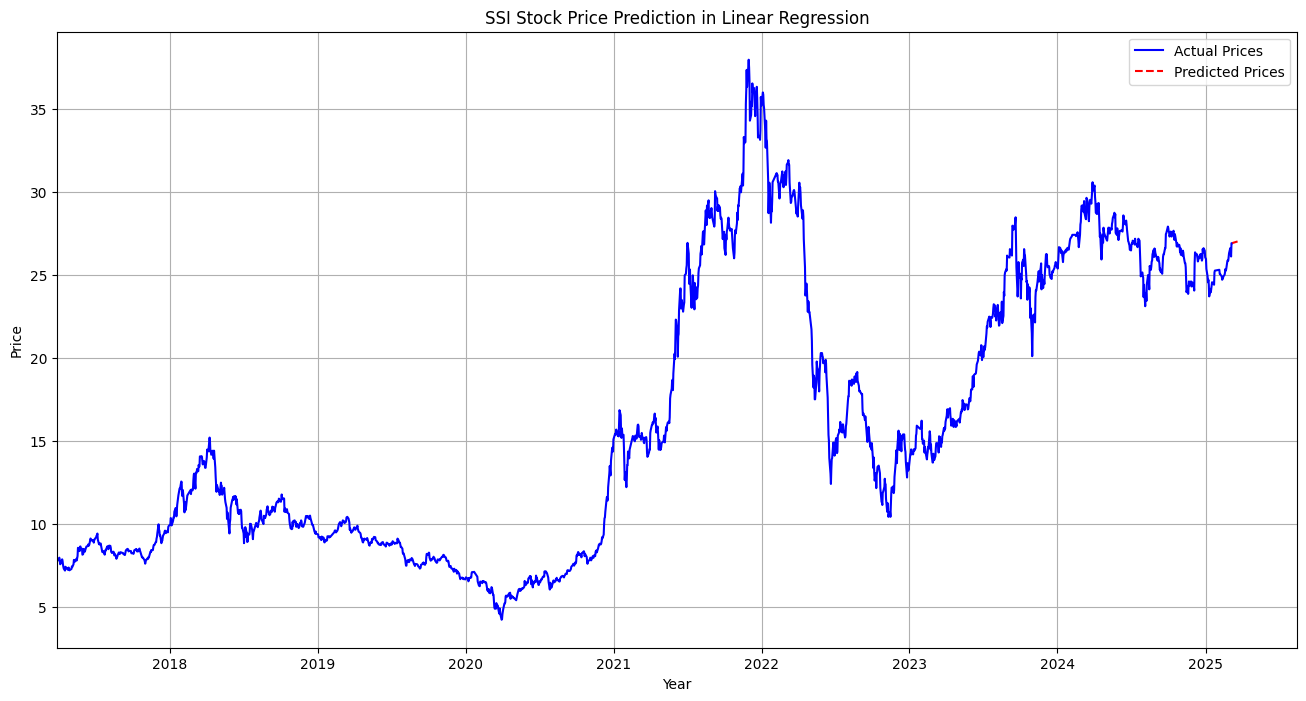

In [5]:
# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(df['<Date>'], df['<Close>'], label='Actual Prices', color='blue')
future_dates = [df['<Date>'].max() + pd.Timedelta(days=i) for i in range(1, 15)]
plt.plot(future_dates, predictions, 'r--', label='Predicted Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('SSI Stock Price Prediction in Linear Regression')
plt.legend()
plt.grid(True)

# Set x-axis limits to show the whole closing stock price with prediction
plt.xlim(df['<Date>'].min() + pd.Timedelta(days=15))
plt.show()